In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import pickle

In [38]:
credit=pd.read_csv(r"C:\Users\M.Vaishnavi\OneDrive\Desktop\creditcard.csv")
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [39]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [41]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [42]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

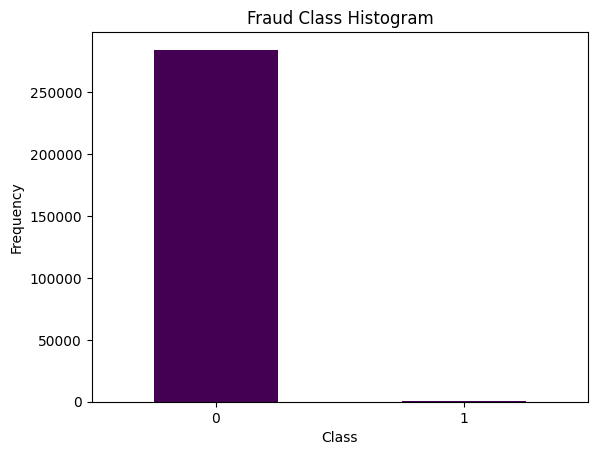

In [43]:
# Checking for the fraud and valid trasactions in a graph for better understanding

count_classes = pd.value_counts(credit['Class'], sort = True ).sort_index()
count_classes.plot(kind = 'bar' ,rot = 0 ,colormap ='viridis')

plt.title ( "Fraud Class Histogram" )
plt.xlabel( "Class" )
plt.ylabel( "Frequency" )

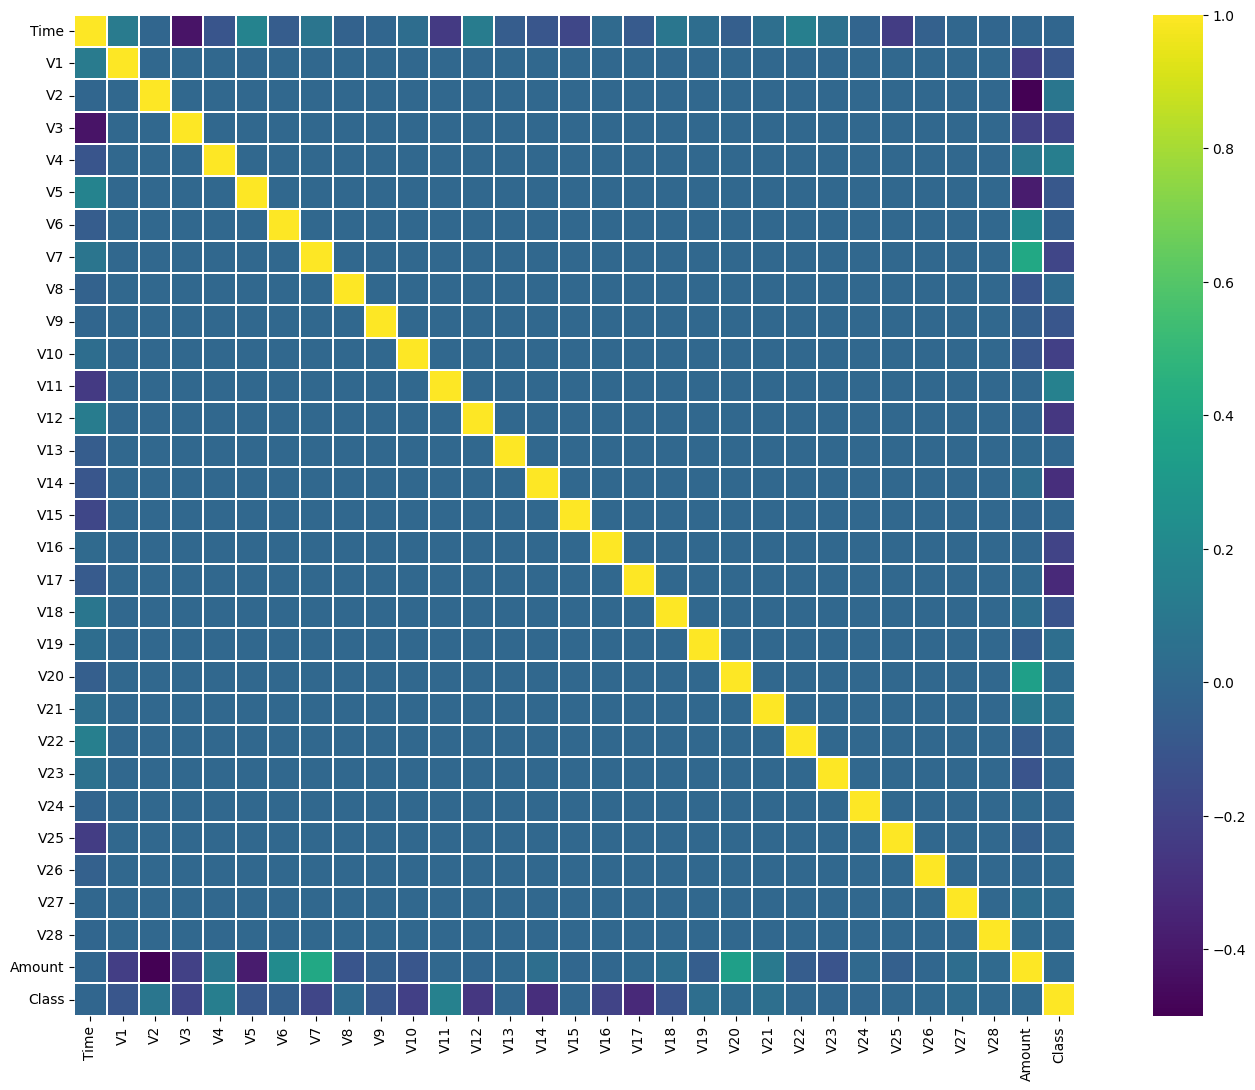

In [44]:
corrmat = credit.corr() 
fig = plt.figure(figsize = (20, 13)) 
sns.heatmap(corrmat, cmap='viridis', vmax = 1, vmin=-0.5 , square = True , linewidths= 0.05)
plt.show()

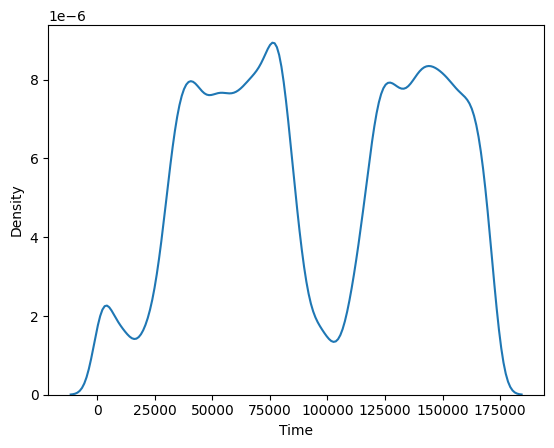

In [45]:
# Distribution of our dataset in Time

sns.kdeplot(credit['Time'])
plt.show()

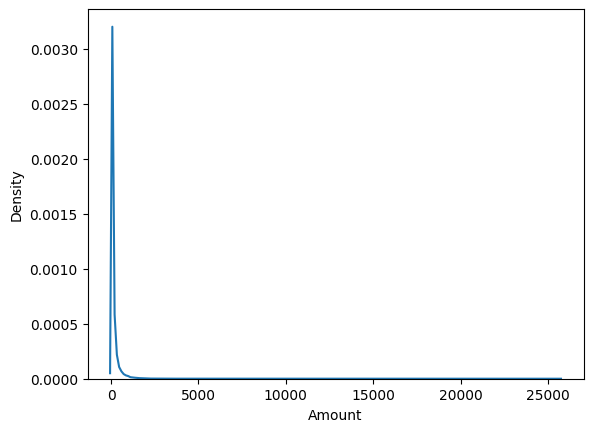

In [46]:
# Distribution of our dataset in Amount of transaction

sns.kdeplot(credit['Amount'])
plt.show()

In [47]:
credit["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This dataset is highly Unbalanced

0 ---> Normal Transaction
1 ---> Fraudulent Transaction

In [48]:
legit=credit[credit.Class==0]
fraud=credit[credit.Class==1]

In [49]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [50]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [51]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [52]:
credit.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [53]:
legit_sample=legit.sample(n=492)

In [54]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [55]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
139868,83405.0,1.234111,0.576719,-0.555481,0.761123,0.133891,-1.142065,0.280368,-0.148035,-0.365646,...,-0.107004,-0.306743,-0.091256,0.206454,0.527288,0.352939,-0.037141,0.031809,0.76,0
264180,161305.0,-3.946591,3.733380,-3.312670,-1.410438,-1.417262,-0.791123,-1.362594,3.038196,-0.145987,...,-0.021912,-0.453257,0.137977,-1.150020,0.446225,-0.023377,0.105885,0.110807,21.22,0
186330,127055.0,-4.302779,-5.175065,1.112752,2.311136,2.328653,-1.762973,-0.142971,-0.007256,0.051157,...,0.912050,0.695570,1.944923,-0.183736,0.459094,-0.396938,-0.088775,0.124621,641.72,0
186856,127282.0,2.125158,-0.673160,-1.051949,-0.523286,-0.928467,-1.130611,-0.870773,-0.177671,0.065878,...,0.243571,0.783656,0.099953,-0.051903,-0.154262,-0.091112,0.027757,-0.010114,24.99,0
266742,162471.0,0.051338,0.250632,-0.146602,-0.603377,-0.289108,0.867031,-0.716845,0.916121,0.761860,...,0.301229,0.682096,0.262251,-0.396272,-1.105012,0.357460,-0.058522,-0.011369,72.00,0


In [56]:
new_dataset["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [57]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90441.270325,-0.012548,0.089961,0.097539,0.045106,-0.081176,0.029137,0.003131,0.095207,-0.050420,...,-0.002672,-0.013686,-0.069534,0.009302,-0.037031,-0.000621,-0.009732,0.013478,-0.007326,84.531504
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [58]:
x=new_dataset.drop(columns="Class",axis=1)
y=new_dataset["Class"]

In [59]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
139868   83405.0  1.234111  0.576719 -0.555481  0.761123  0.133891 -1.142065   
264180  161305.0 -3.946591  3.733380 -3.312670 -1.410438 -1.417262 -0.791123   
186330  127055.0 -4.302779 -5.175065  1.112752  2.311136  2.328653 -1.762973   
186856  127282.0  2.125158 -0.673160 -1.051949 -0.523286 -0.928467 -1.130611   
266742  162471.0  0.051338  0.250632 -0.146602 -0.603377 -0.289108  0.867031   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [60]:
print(y)

139868    0
264180    0
186330    0
186856    0
266742    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Negative Correlation Boxtplos 



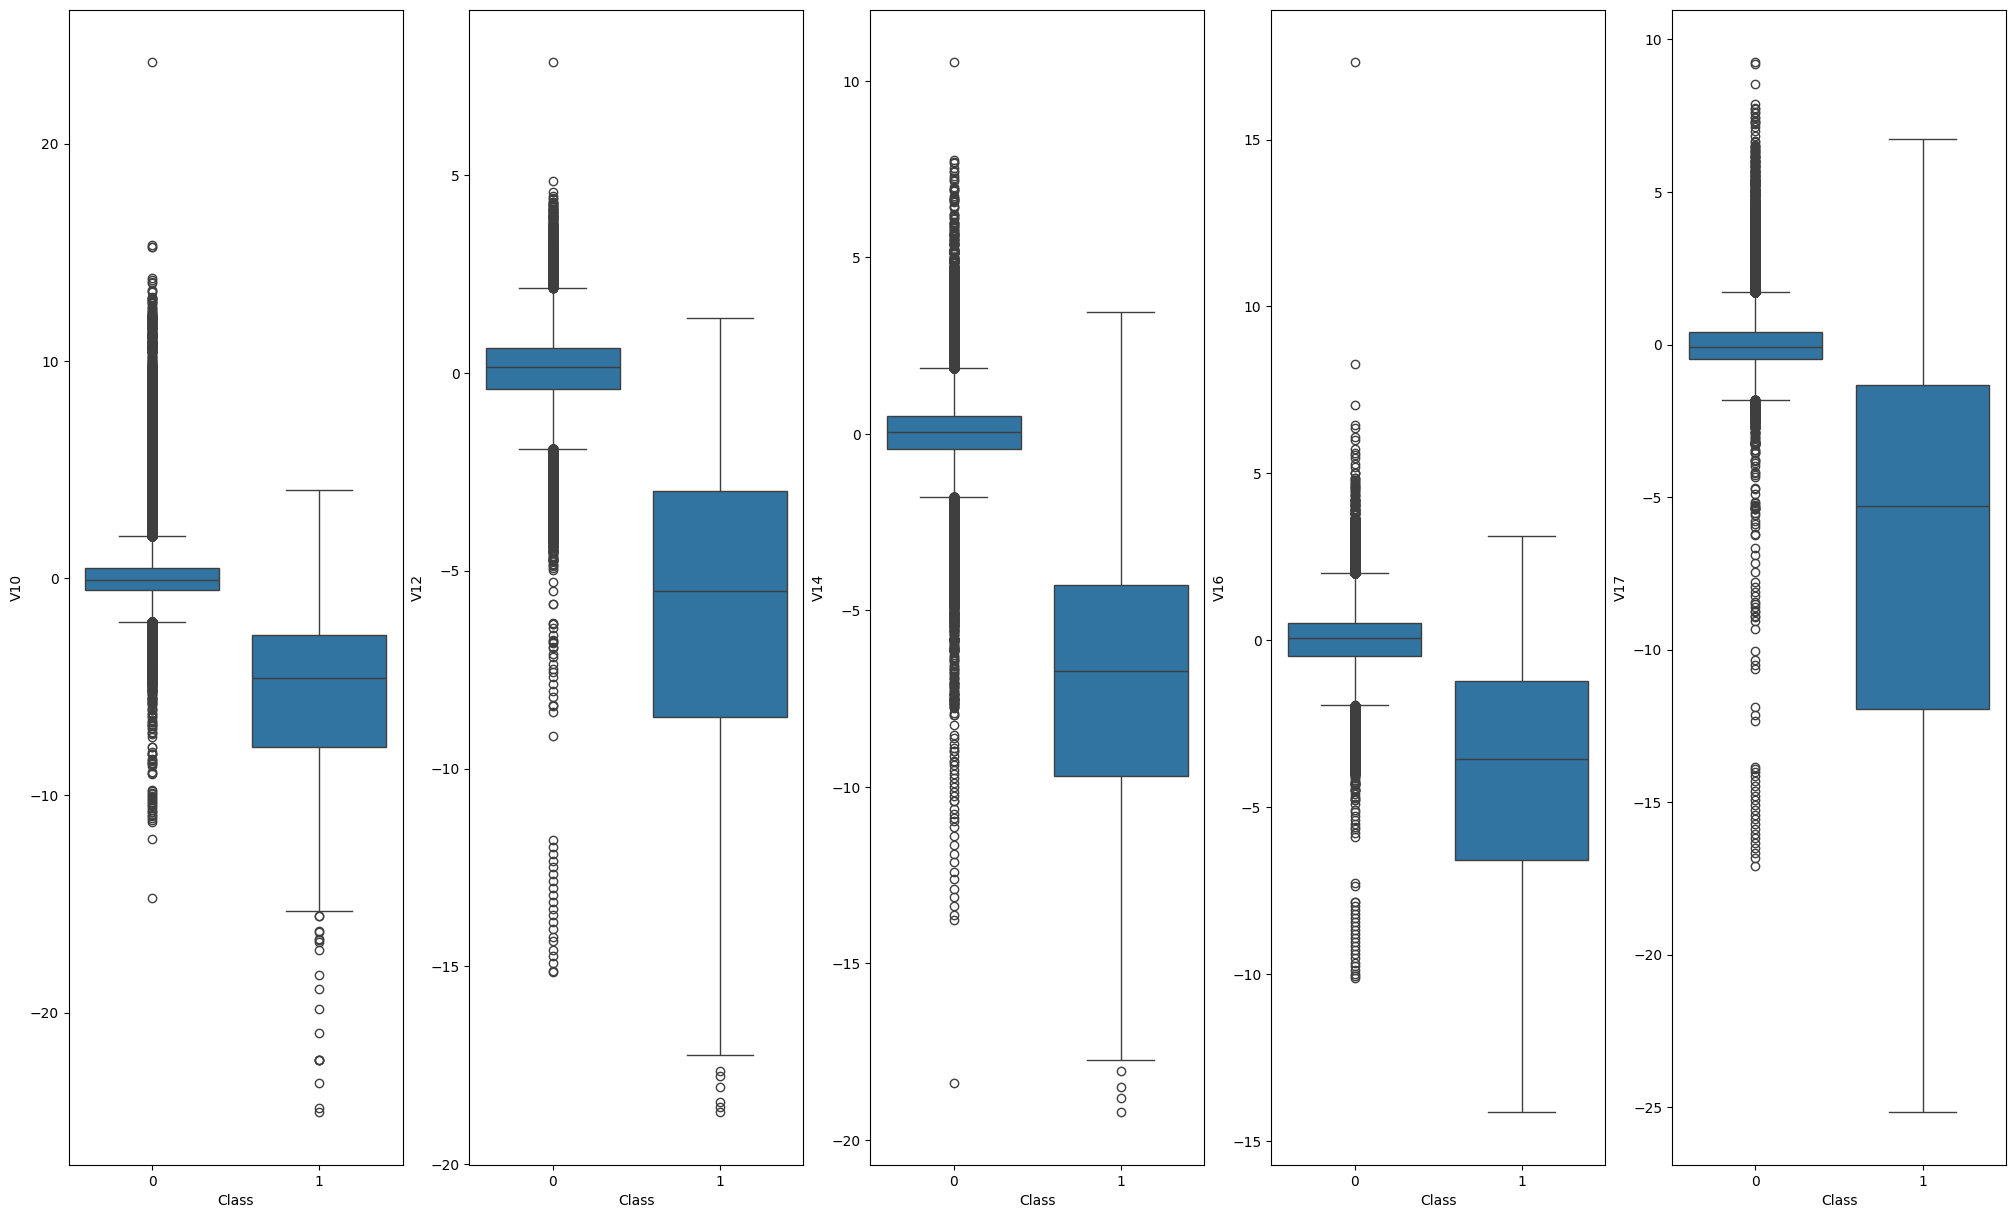

In [61]:
# Negative correlation: The lower the feature value,the probability decreases that it will be a fraudulent transaction.

f, axes = plt.subplots(ncols=5, figsize=(25,15))

sns.boxplot( x='Class' , y ='V10', data = credit, ax=axes[0] )
sns.boxplot( x='Class' , y ='V12', data = credit, ax=axes[1] )
sns.boxplot( x='Class' , y ='V14', data = credit, ax=axes[2] )
sns.boxplot( x='Class' , y ='V16', data = credit, ax=axes[3] )
sns.boxplot( x='Class' , y ='V17', data = credit, ax=axes[4] )

print('Negative Correlation Boxtplos' , '\n')
plt.show()

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [63]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [64]:
model = LogisticRegression()

In [65]:
model.fit(x_train,y_train)

LogisticRegression()

Model Accuracy:

 0.92
Model Precision: 0.95
Model Recall: 0.89
Model F1-Score: 0.92 

              precision    recall  f1-score   support

       Valid       0.90      0.95      0.92        99
       Fraud       0.95      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197
 



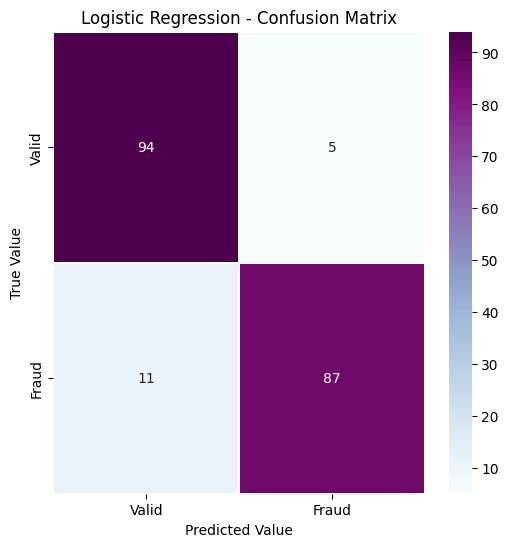

In [66]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 42)
logreg.fit(x_train, y_train)
y_pred1 = logreg.predict(x_test)

print("Model Accuracy:", round(accuracy_score(y_test, y_pred1),2))
print("Model Precision:", round(precision_score(y_test, y_pred1),2))
print("Model Recall:", round(recall_score(y_test, y_pred1),2))
print("Model F1-Score:", round(f1_score(y_test, y_pred1),2) , '\n')

conf_matrix1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6, 6)) 
labels= ['Valid', 'Fraud'] 

sns.heatmap(pd.DataFrame(conf_matrix1),annot=True, fmt='d',
            linewidths= 0.05 ,cmap='BuPu',xticklabels= labels, yticklabels= labels)

print(classification_report(y_test, y_pred1, target_names=labels) , '\n')

plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [67]:
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [68]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [69]:
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.951715374841169


In [70]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)


In [71]:
print("Accuracy on test data:",test_data_accuracy)

Accuracy on test data: 0.9187817258883249


Model Precision: 0.99
Model Recall: 0.87
Model F1-Score: 0.92
Model ROC: 0.93 

              precision    recall  f1-score   support

       Valid       0.88      0.99      0.93        99
       Fraud       0.99      0.87      0.92        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197
 



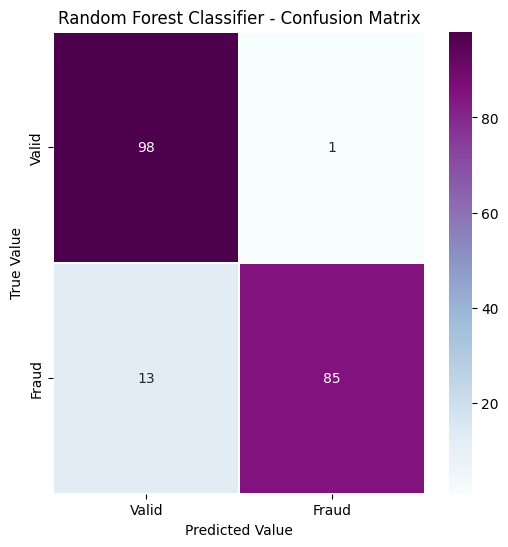

Model Accuracy: 0.93


In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier( random_state = 42 ) 
rfc.fit(x_train, y_train) 
y_pred=rfc.predict(x_test) 

print("Model Precision:", round(precision_score(y_test, y_pred),2))
print("Model Recall:", round(recall_score(y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(y_test, y_pred) 
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(6, 6)) 

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels, 
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_test, y_pred, target_names=labels) , '\n')

plt.title("Random Forest Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print("Model Accuracy:", round(accuracy_score(y_test, y_pred),2))


In [ ]:
import pickle